In [ ]:
!pip install pyod

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyod
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.svm import OneClassSVM
from pyod.models.deep_svdd import DeepSVDD
import scipy.io as sio
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
# Exercise 1

X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, contamination=0.15, n_features=3)

In [4]:
model1 = OCSVM(kernel='linear', contamination=0.15)

model1.fit(X_train, y_train)
preds_prob = model1.predict_proba(X_test)
preds = model1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [5]:
y_test_onehot = []

for label in y_test:
  if label == 0:
    y_test_onehot.append([1, 0])
  else:
    y_test_onehot.append([0, 1])

In [6]:
BA = balanced_accuracy_score(y_test, preds)
print('Balanced Accuracy for linear OCSVM', BA)

roc_auc = roc_auc_score(y_test_onehot, preds_prob)

print('ROC AUC score', roc_auc)

Balanced Accuracy for linear OCSVM 0.42058823529411765
ROC AUC score 0.5764705882352941


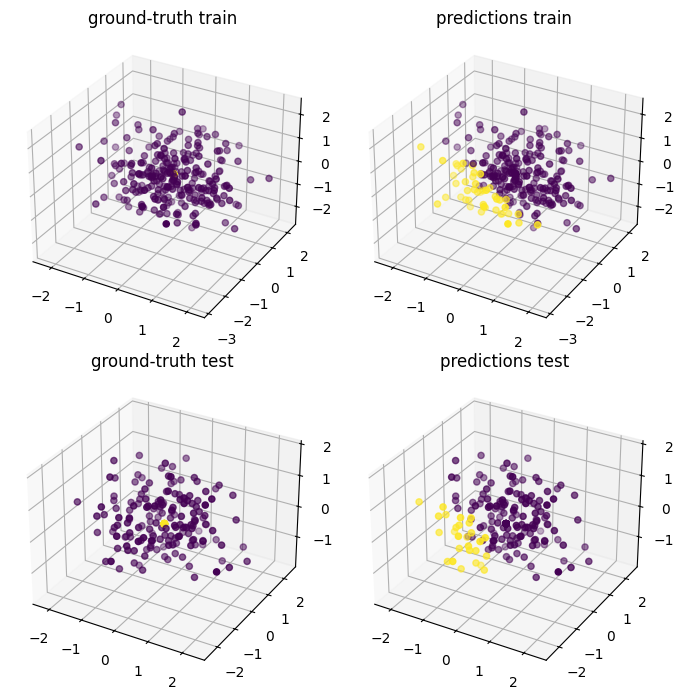

In [7]:
train_preds = model1.predict(X_train)

fig = plt.figure(figsize=(7, 7))

plotting_data = {
    'ground-truth train': (X_train, y_train),
    'predictions train': (X_train, train_preds),
    'ground-truth test': (X_test, y_test),
    'predictions test': (X_test, preds)
}

for idx, (name, (data, labels)) in enumerate(plotting_data.items()):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')
    ax.set_title(name)

    scatter = ax.scatter(data[:, :1], data[:, 1:2], data[:, 2:3], c=labels, cmap='viridis')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


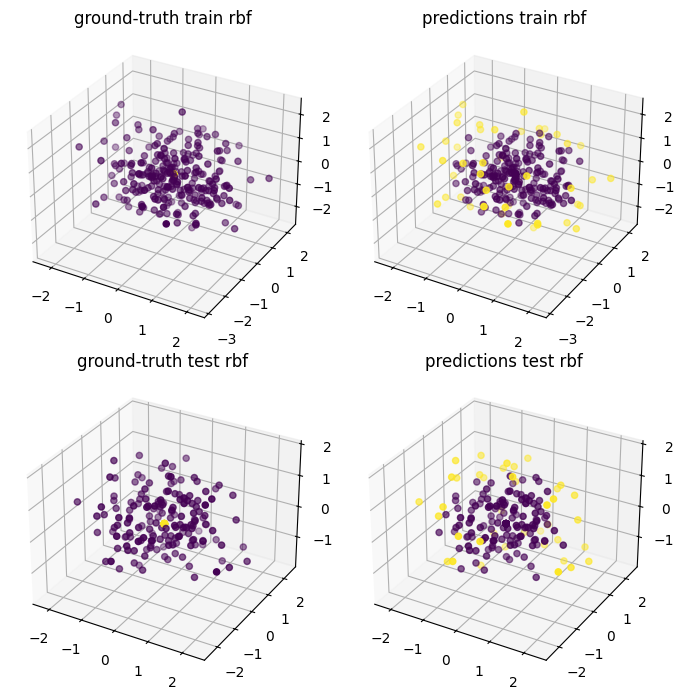

In [8]:
model2 = OCSVM(kernel='rbf', contamination=0.15)

model2.fit(X_train, y_train)
train_preds = model2.predict(X_train)
preds_prob = model2.predict_proba(X_test)
preds = model2.predict(X_test)

y_test_onehot = []

for label in y_test:
  if label == 0:
    y_test_onehot.append([1, 0])
  else:
    y_test_onehot.append([0, 1])

fig = plt.figure(figsize=(7, 7))

plotting_data = {
    'ground-truth train rbf': (X_train, y_train),
    'predictions train rbf': (X_train, train_preds),
    'ground-truth test rbf': (X_test, y_test),
    'predictions test rbf': (X_test, preds)
}

for idx, (name, (data, labels)) in enumerate(plotting_data.items()):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')
    ax.set_title(name)

    scatter = ax.scatter(data[:, :1], data[:, 1:2], data[:, 2:3], c=labels, cmap='viridis')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Epoch 1/100, Loss: 10.963671505451202
Epoch 2/100, Loss: 10.422538995742798
Epoch 3/100, Loss: 10.34545123577118
Epoch 4/100, Loss: 10.548832714557648
Epoch 5/100, Loss: 10.407718479633331
Epoch 6/100, Loss: 10.6081423163414
Epoch 7/100, Loss: 10.662835896015167
Epoch 8/100, Loss: 10.67586886882782
Epoch 9/100, Loss: 10.795537054538727
Epoch 10/100, Loss: 10.40420413017273
Epoch 11/100, Loss: 10.419583141803741
Epoch 12/100, Loss: 10.28335976600647
Epoch 13/100, Loss: 10.623494565486908
Epoch 14/100, Loss: 10.343849778175354
Epoch 15/100, Loss: 10.292803585529327
Epoch 16/100, Loss: 10.292396485805511
Epoch 17/100, Loss: 10.940907955169678
Epoch 18/100, Loss: 10.633818089962006
Epoch 19/100, Loss: 10.66254836320877
Epoch 20/100, Loss: 10.610524713993073
Epoch 21/100, Loss: 10.792452931404114
Epoch 22/100, Loss: 10.750298798084259
Epoch 23/100, Loss: 10.35967481136322
Epoch 24/100, Loss: 10.659850835800171
Epoch 25/100, Loss: 10.446998000144958
Epoch 26/100, Loss: 10.431527078151703
Epo

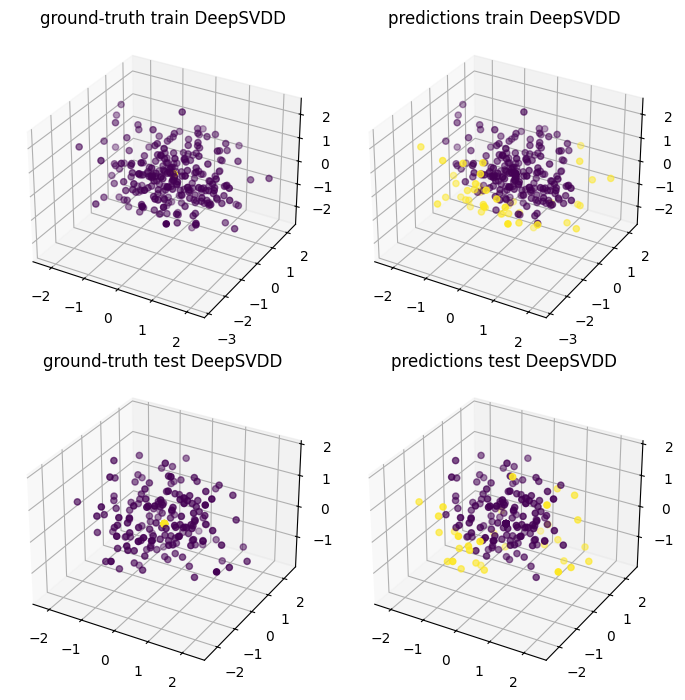

In [9]:
model3 = DeepSVDD(n_features=3, contamination=0.15)

model3.fit(X_train, y_train)
preds_prob = model3.predict_proba(X_test)
preds = model3.predict(X_test)
train_preds = model3.predict(X_train)

BA = balanced_accuracy_score(y_test, preds)
print('Balanced Accuracy for DeepSVDD', BA)

roc_auc = roc_auc_score(y_test_onehot, preds_prob)
print('ROC AUC score for DeepSVDD', roc_auc)


fig = plt.figure(figsize=(7, 7))

plotting_data = {
    'ground-truth train DeepSVDD': (X_train, y_train),
    'predictions train DeepSVDD': (X_train, train_preds),
    'ground-truth test DeepSVDD': (X_test, y_test),
    'predictions test DeepSVDD': (X_test, preds)
}

for idx, (name, (data, labels)) in enumerate(plotting_data.items()):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')
    ax.set_title(name)

    scatter = ax.scatter(data[:, :1], data[:, 1:2], data[:, 2:3], c=labels, cmap='viridis')

plt.tight_layout()
plt.show()

In [11]:
# Exercise 2
!gdown 1wMY42WMxu4m4zC0ULi9GpCRVI_NP8LG-

Downloading...
From (original): https://drive.google.com/uc?id=1wMY42WMxu4m4zC0ULi9GpCRVI_NP8LG-
From (redirected): https://drive.google.com/uc?id=1wMY42WMxu4m4zC0ULi9GpCRVI_NP8LG-&confirm=t&uuid=7fe146ac-fc17-4853-b077-a63278451a9d
To: /content/cardio 1.mat
100% 68.3k/68.3k [00:00<00:00, 47.3MB/s]


In [12]:
data = sio.loadmat('/content/cardio 1.mat')

for i in range(len(data['y'])):
  if data['y'][i] == 1:
    data['y'][i] = -1
  else:
    data['y'][i] = 1

X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.6, random_state=42)

In [13]:
params = [{'kernel': ['linear', 'poly', 'rbf'],
         'gamma': [0.1, 0.25, 0.5, 1],
         'nu': [0.1, 0.2, 0.5]}]

In [14]:
data_pipeline = make_pipeline(StandardScaler(),
                              GridSearchCV(OneClassSVM(),
                                          param_grid=params,
                                          cv=4,
                                          refit=True,
                                          scoring='balanced_accuracy'))

data_pipeline.fit(X_train, y_train)
preds = data_pipeline.predict(X_test)

In [15]:
print(data_pipeline[1].best_params_)
print(data_pipeline[1].best_score_)

{'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.5}
0.753186415190799


In [16]:
# Exercise 3

!gdown 1xoT2nSQYkghfi7286BM_nu8VC9NVvMww

Downloading...
From (original): https://drive.google.com/uc?id=1xoT2nSQYkghfi7286BM_nu8VC9NVvMww
From (redirected): https://drive.google.com/uc?id=1xoT2nSQYkghfi7286BM_nu8VC9NVvMww&confirm=t&uuid=2cda4b53-a0b9-43b6-a489-ad64efb8f787
To: /content/shuttle 1.mat
100% 345k/345k [00:00<00:00, 44.5MB/s]


In [17]:
print(np.array(data['X']).shape)

(1831, 21)


In [39]:
data = sio.loadmat('/content/shuttle 1.mat')

X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.5, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# different architectures

models_dict = {
  'OCSVM': OCSVM(kernel='rbf'),
  'DeepSVDD': DeepSVDD(n_features=9),
  # 'DeepSVDD_AE': DeepSVDD(n_features=9, use_ae=True),
  # 'DeepSVDD_AE2': DeepSVDD(n_features=9, use_ae=True, hidden_neurons=[9, 6, 5])
}

In [40]:
y_test_onehot = []

for label in y_test:
  if label == 0:
    y_test_onehot.append([1, 0])
  else:
    y_test_onehot.append([0, 1])

for name, model in models_dict.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  preds_probs = model.predict_proba(X_test)

  BA = balanced_accuracy_score(y_test, preds)
  print(f'Balanced Accuracy {name}:', BA)

  roc_auc = roc_auc_score(y_test_onehot, preds_probs)
  print(f'ROC AUC score {name}:', roc_auc)

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Balanced Accuracy OCSVM: 0.9709030464381121
ROC AUC score OCSVM: 0.9924824366062397


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Epoch 1/100, Loss: 561.4975343793631
Epoch 2/100, Loss: 561.476070612669
Epoch 3/100, Loss: 562.3134015649557
Epoch 4/100, Loss: 561.6073086708784
Epoch 5/100, Loss: 561.9795327633619
Epoch 6/100, Loss: 561.4756513684988
Epoch 7/100, Loss: 561.4105276614428
Epoch 8/100, Loss: 561.379961386323
Epoch 9/100, Loss: 561.637068733573
Epoch 10/100, Loss: 561.5050617009401
Epoch 11/100, Loss: 561.6810332387686
Epoch 12/100, Loss: 561.6172610968351
Epoch 13/100, Loss: 562.0705384761095
Epoch 14/100, Loss: 561.5873697251081
Epoch 15/100, Loss: 561.5793924629688
Epoch 16/100, Loss: 561.5100425928831
Epoch 17/100, Loss: 561.4921521693468
Epoch 18/100, Loss: 562.0379039049149
Epoch 19/100, Loss: 561.6469146758318
Epoch 20/100, Loss: 561.3773495405912
Epoch 21/100, Loss: 562.0630826205015
Epoch 22/100, Loss: 561.4563419222832
Epoch 23/100, Loss: 561.5207567662001
Epoch 24/100, Loss: 561.8363770246506
Epoch 25/100, Loss: 561.3408368080854
Epoch 26/100, Loss: 562.0304074734449
Epoch 27/100, Loss: 561.